In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from math import prod

Fonction for adding salt and pepper noise

In [114]:
def add_noise(image, percent):
    noisy_image = image.copy()
    height, width = image.shape

    noise_amount = int(height * width * (percent / 100))

    # add salt noise
    for i in range(noise_amount):
        xcoord = random.randint(0, width - 1)
        ycoord = random.randint(0, height - 1)
        noisy_image[ycoord][xcoord] = 255

    # add pepper noise
    for i in range(noise_amount):
        xcoord = random.randint(0, width - 1)
        ycoord = random.randint(0, height - 1)
        noisy_image[ycoord][xcoord] = 0

    return noisy_image

Function for Harmonic Mean Filter

In [115]:
def hermonic_mean_filter(image, kernel):
    filtered_image = np.zeros_like(image)
    height, width = image.shape

    padding = kernel // 2

    starting_row = 0 + padding
    starting_col = 0 + padding
    ending_row = height - padding
    ending_col = width - padding

    for row in range(starting_row, ending_row):
        for col in range(starting_col, ending_col):
            values = []            
            for x in range(row - padding, row + padding + 1):
                for y in range(col - padding, col + padding + 1):
                    if image[x][y] != 0:
                        values.append(1 / image[x][y])
            if values:
                filtered_image[row][col] = int(len(values) / np.sum(values))

    return filtered_image

Function for Geometric Mean Filter

In [116]:
def geometric_mean_filter(image, kernel):
    filtered_image = np.zeros_like(image)
    height, width = image.shape

    padding = kernel // 2

    starting_row = 0 + padding
    starting_col = 0 + padding
    ending_row = height - padding
    ending_col = width - padding

    for row in range(starting_row, ending_row):
        for col in range(starting_col, ending_col):
            values = []            
            for x in range(row - padding, row + padding + 1):
                for y in range(col - padding, col + padding + 1):
                    if image[x][y] != 0:
                        values.append(image[x][y])
            if values:
                product = np.prod(values)
                filtered_image[row][col] = product ** (1 / len(values))

    return filtered_image

Calculating PSNR value

In [117]:
def cal_PSNR(original_image, noisy_image):
    original_image, noisy_image = np.float64(original_image), np.float64(noisy_image)

    Imax = 255.0
    mse = np.mean((original_image - noisy_image) ** 2)
    PSNR_val = 20 * np.log10(Imax / np.sqrt(mse))

    return round(PSNR_val, 2)

Loading the original image

In [118]:
original_image = cv2.imread('./images/pcb.png', 0)
gray_image = cv2.resize(original_image, (512, 512))

Adding salt and pepper noise

In [119]:
percent = 10
noisy_image = add_noise(gray_image, percent)
noisy_PSNR = cal_PSNR(gray_image, noisy_image)

Applyig Hamonic and Geometric mean filter

In [120]:
kernel = 5
harmonic_mean_filtered_image = hermonic_mean_filter(noisy_image, kernel)
geometric_mean_filtered_image = geometric_mean_filter(noisy_image, kernel)

harmonic_PSNR = cal_PSNR(gray_image, harmonic_mean_filtered_image)
geometric_PSNR = cal_PSNR(gray_image, geometric_mean_filtered_image)


Displaying original and noisy images

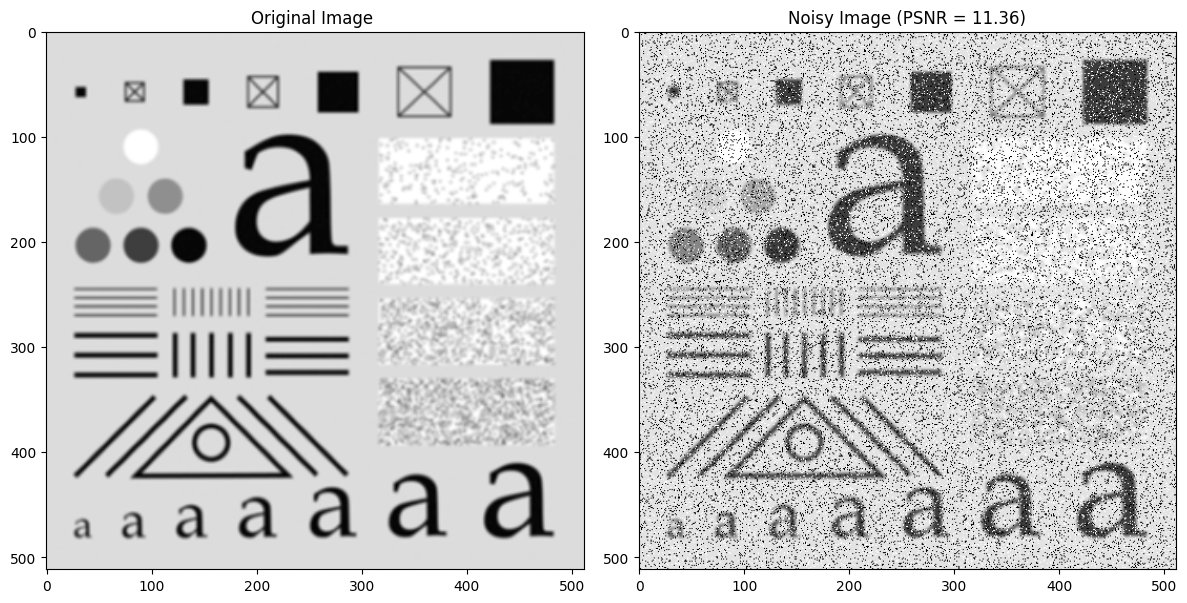

In [121]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image ")

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f"Noisy Image (PSNR = {noisy_PSNR})")

plt.tight_layout()
plt.show()

Displaying Geometric and Harmonic Mean filtered images

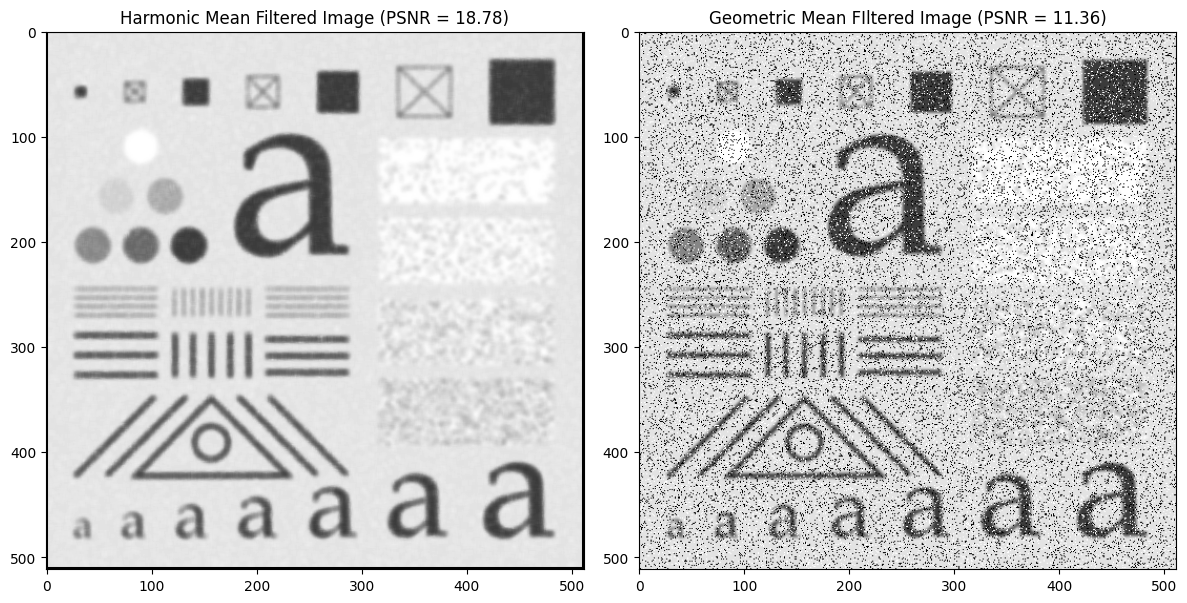

In [122]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(harmonic_mean_filtered_image, cmap='gray')
plt.title(f"Harmonic Mean Filtered Image (PSNR = {harmonic_PSNR})")

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f"Geometric Mean FIltered Image (PSNR = {noisy_PSNR})")

plt.tight_layout()
plt.show()